/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
!pip install yfinance
!pip install yahoofinancials

     |████████████████████████████████| 6.4 MB 40.5 MB/s 
     |████████████████████████████████| 63 kB 1.8 MB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0
  Attempting uninstall: lxml
    Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires requests~=2.23.0, but you have requests 2.27.1 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.
  Created wheel for yahoofinancials: filename=yahoofinancials-1.6-py3-none-any.whl size=15192 sha256=6b034c1ab93fe66c22622b6cf542092cd3c5cb681f1971fa411ecb9e7e5e8980
  Stored in directory: /root/.cache/pip/wheels/4

In [ ]:

import pandas as pd
import yfinance as yf
from yahoofinancials import YahooFinancials
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import acf, pacf 
from sklearn.metrics import mean_squared_error, mean_absolute_error
import math

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
#pobieram sobie akcje
tsla_df = yf.download('TSLA', 
                      start='2016-01-01', 
                      end='2022-02-25', 
                      progress=False)
tsla_df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2016-01-04,46.144001,46.276001,43.799999,44.681999,44.681999,34135500
2016-01-05,45.271999,45.377998,44.000000,44.686001,44.686001,15934000
2016-01-06,44.000000,44.009998,43.195999,43.807999,43.807999,18895500
2016-01-07,42.838001,43.688000,42.734001,43.130001,43.130001,17771500
2016-01-08,43.571999,44.088001,42.153999,42.200001,42.200001,18140500


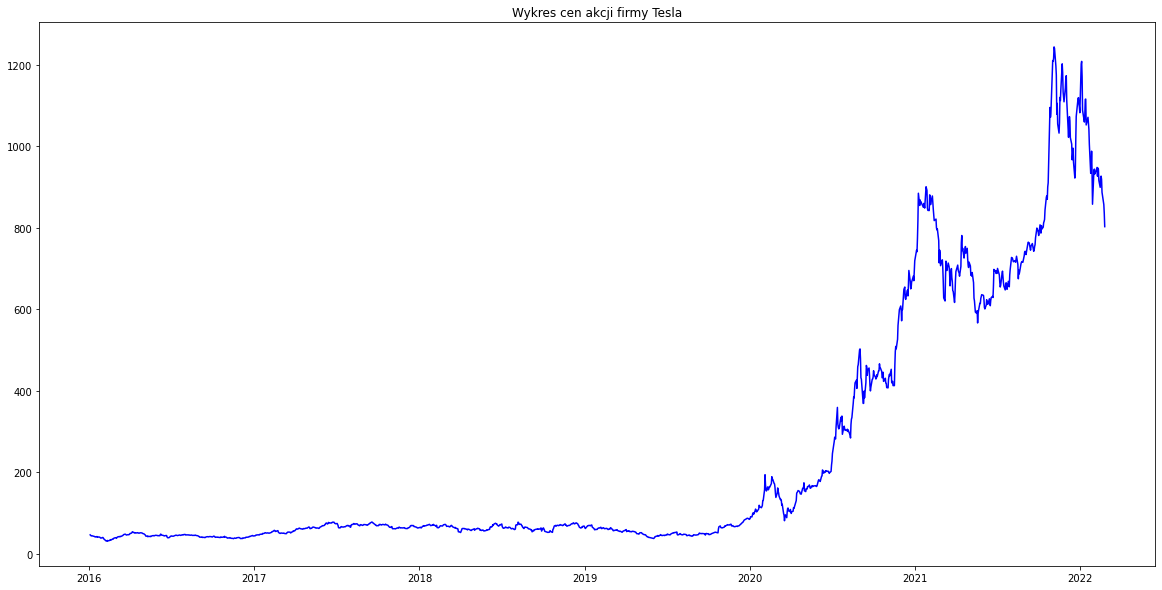

In [ ]:
#tworze wykres cen
plt.figure(figsize=[20,10])
plt.plot(tsla_df['High'], color = 'blue')
plt.title('Wykres cen akcji firmy Tesla')
plt.show()

In [ ]:
tsla_df_hi = tsla_df['High']

In [ ]:
#podział na train test 
tsla_train = tsla_df_hi.loc[:'2020']
tsla_test = tsla_df_hi.loc['2021':]

In [ ]:
#próbuje arime 

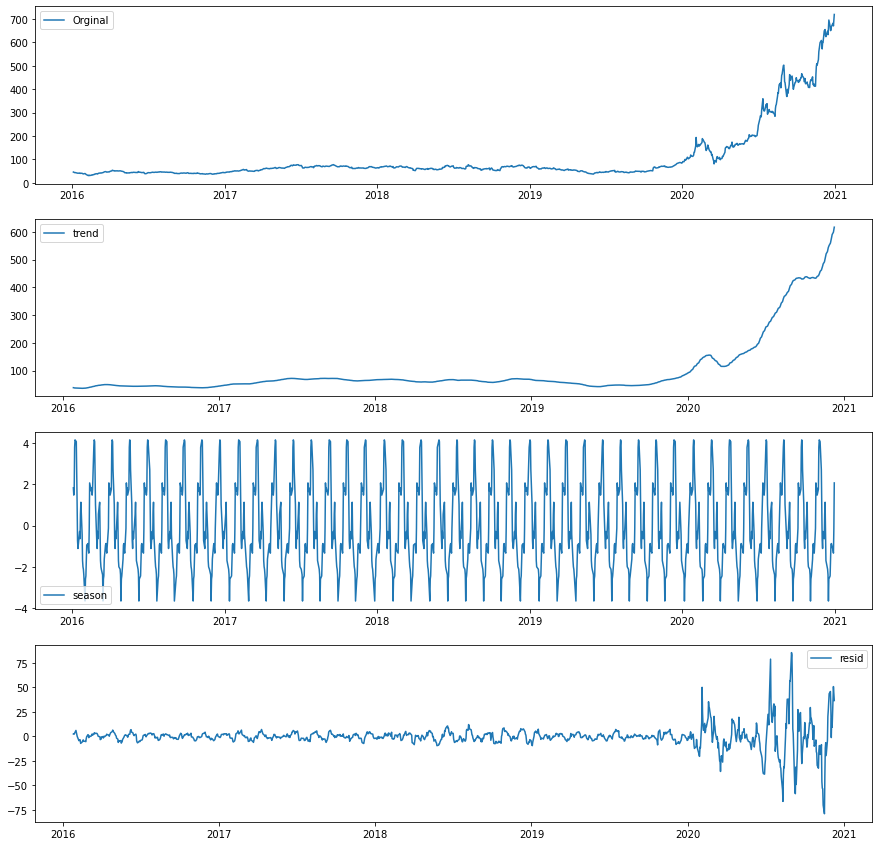

In [ ]:
decomposition = seasonal_decompose(tsla_train, freq = 30)
trend = decomposition.trend
season = decomposition.seasonal
resid = decomposition.resid



plt.figure(figsize=[15, 15])
plt.subplot(411)
plt.plot(tsla_train, label = 'Orginal')
plt.legend(loc = 'best')
plt.subplot(412)
plt.plot(trend, label = 'trend')
plt.legend(loc = 'best')
plt.subplot(413)
plt.plot(season, label = 'season')
plt.legend(loc = 'best')
plt.subplot(414)
plt.plot(resid, label = 'resid')
plt.legend(loc = 'best')

In [ ]:
#badam stacjonarność szeregu
rollmean = tsla_train.rolling(window = 30).mean()
rollstd = tsla_train.rolling(window=30).std()

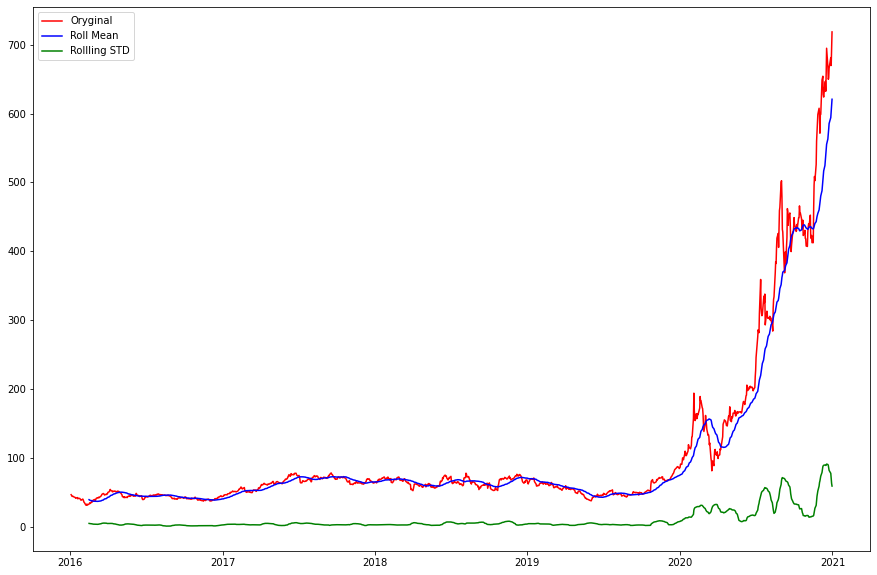

In [ ]:
plt.figure(figsize = [15,10])
plt.plot(tsla_train , color = 'red', label = 'Oryginal')
plt.plot(rollmean, color = 'blue', label = 'Roll Mean')
plt.plot( rollstd, color = 'green', label= 'Rollling STD')

plt.legend(loc='best')

In [ ]:
#test dickeya fullera na stacjonarność - szereg niestacjonarny
from statsmodels.tsa.stattools import adfuller
difu_test = adfuller(tsla_train, autolag = 'AIC')

In [ ]:
pd.DataFrame(['t stat', 'p val', 'lags','observat'],difu_test[0:4])

,0
5.548499,t stat
1.000000,p val
23.000000,lags
1235.000000,observat


In [ ]:
#transformacje log
tsla_train_log = np.log(tsla_train)

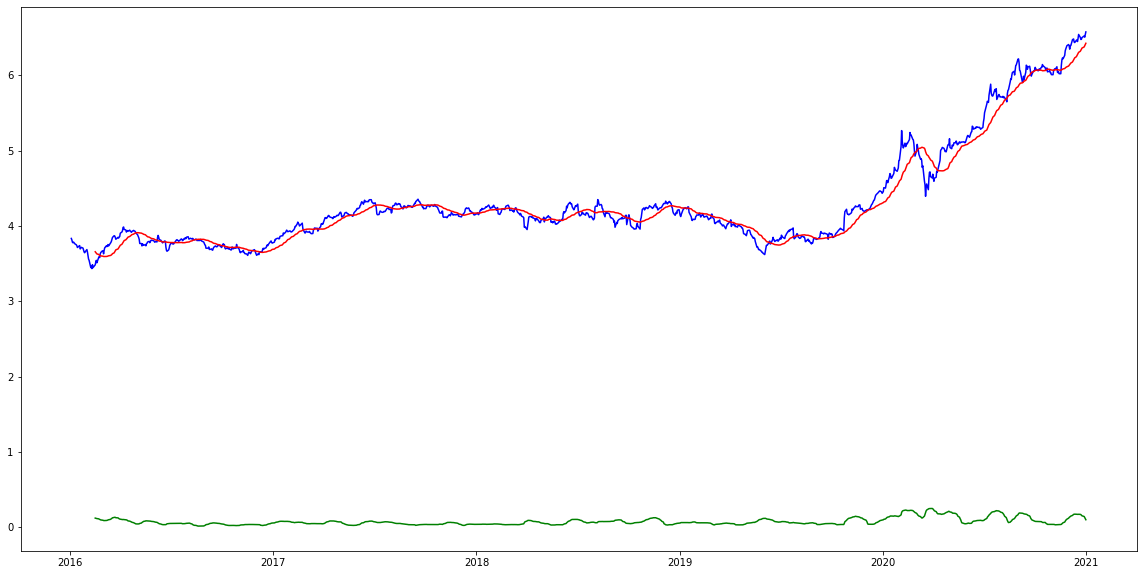

In [ ]:
std_log = tsla_train_log.rolling(window=30).std()
mean_log = tsla_train_log.rolling(window=30).mean()

plt.figure(figsize=[20,10])
plt.plot(tsla_train_log, color = 'blue')
plt.plot(std_log, color = 'green')
plt.plot(mean_log, color = 'red')

plt.show()

In [ ]:
# przekształcenie logarytmiczne pozwoliło nam wypłaszczyć "rolling" odchylenie standardowe

In [ ]:
# odejmuje opóźnienie, żeby sprawdzić, czy da nam to szereg stacjonarny
tsla_train_log_diff = tsla_train_log - tsla_train_log.shift(1)

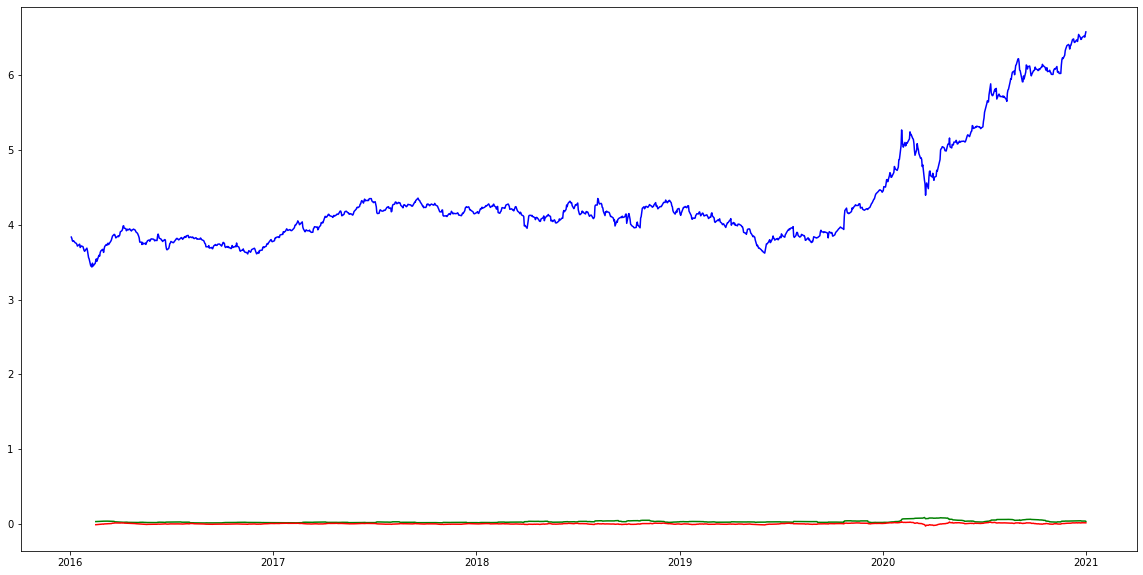

In [ ]:
std_log = tsla_train_log_diff.rolling(window=30).std()
mean_log = tsla_train_log_diff.rolling(window=30).mean()

plt.figure(figsize=[20,10])
plt.plot(tsla_train_log, color = 'blue')
plt.plot(std_log, color = 'green')
plt.plot(mean_log, color = 'red')

plt.show()

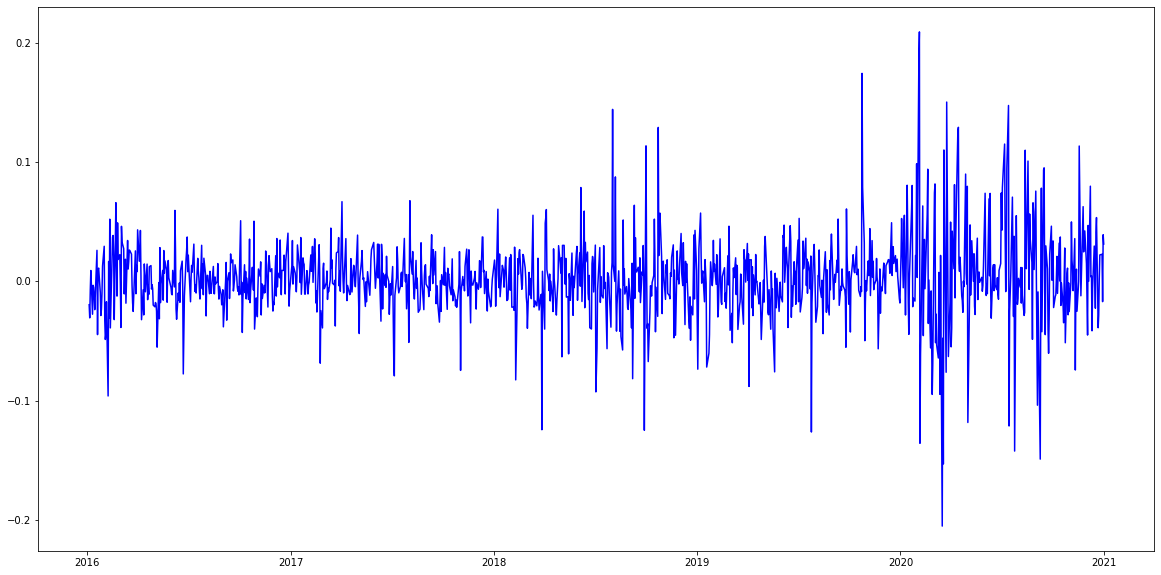

In [ ]:

plt.figure(figsize=[20,10])
plt.plot(tsla_train_log_diff, color = 'blue')
plt.show()

In [ ]:
#Patrząc po wykresach mamy do czynienia z szeregiem stacjonarnym

In [ ]:
tsla_train_log_diff.dropna(inplace=True)

In [ ]:

difu_test2 = adfuller(tsla_train_log_diff, autolag = 'AIC')
pd.DataFrame(['t stat', 'p val', 'lags','observat'],difu_test2[0:4])

,0
-31.64263,t stat
0.00000,p val
0.00000,lags
1257.00000,observat


In [ ]:
# Test Dickeya-Fullera potwierdza stacjonatność szeregu 

In [ ]:
#sprawdzam jakie dobrać p i q w modelu

In [ ]:
lag_acf = acf(tsla_train_log_diff, nlags = 30)
lag_pacf = pacf(tsla_train_log_diff, nlags = 30, method = 'ols')

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/stattools.py:541: FutureWarning: fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, ' PACF ')

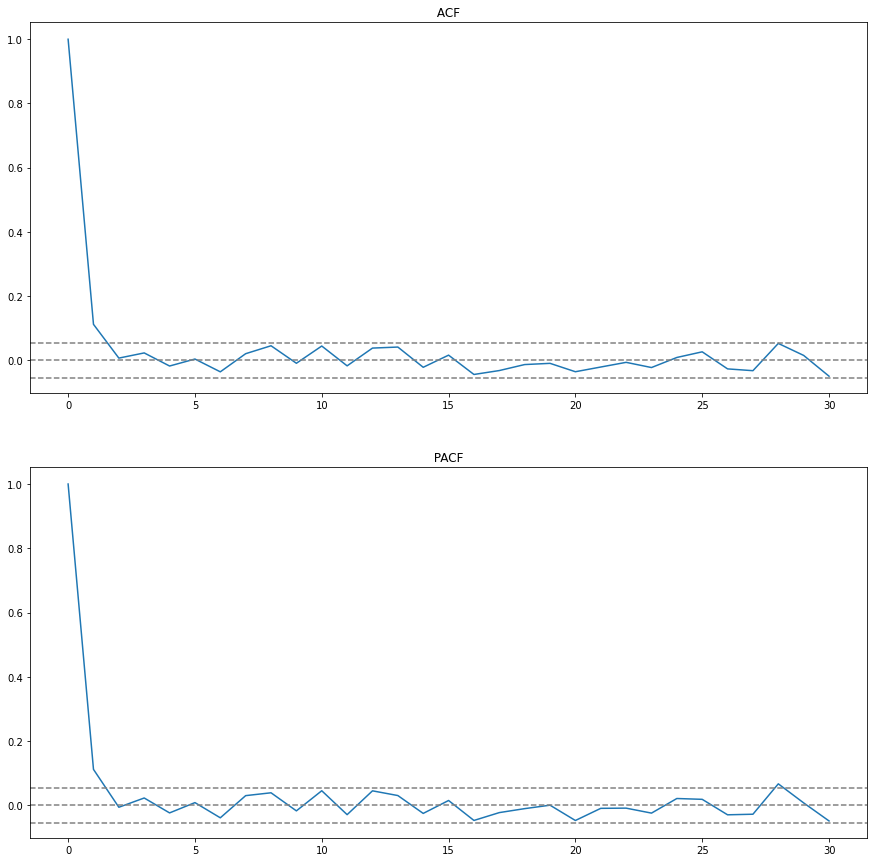

In [ ]:
plt.figure(figsize = [15,15])
plt.subplot(2,1,1)
plt.plot(lag_acf)
plt.axhline(y=0, linestyle = '--', color='grey')
plt.axhline(y=-1.96/np.sqrt(len(tsla_train_log_diff)), linestyle = '--', color = 'grey')
plt.axhline(y=1.96/np.sqrt(len(tsla_train_log_diff)), linestyle = '--', color = 'grey')
plt.title(' ACF ')

plt.subplot(2,1,2)
plt.plot(lag_pacf)
plt.axhline(y=0, linestyle = '--', color='grey')
plt.axhline(y=-1.96/np.sqrt(len(tsla_train_log_diff)), linestyle = '--', color = 'grey')
plt.axhline(y=1.96/np.sqrt(len(tsla_train_log_diff)), linestyle = '--', color = 'grey')
plt.title(' PACF ')

In [ ]:
from statsmodels.tsa.arima_model import ARIMA

In [ ]:
tsla_train_log

Date
2016-01-04    3.834623
2016-01-05    3.815027
2016-01-06    3.784417
2016-01-07    3.777073
2016-01-08    3.786188
                ...   
2020-12-24    6.501425
2020-12-28    6.524150
2020-12-29    6.507128
2020-12-30    6.546211
2020-12-31    6.577472
Name: High, Length: 1259, dtype: float64

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


Text(0.5, 1.0, 'RSS :1.4057')

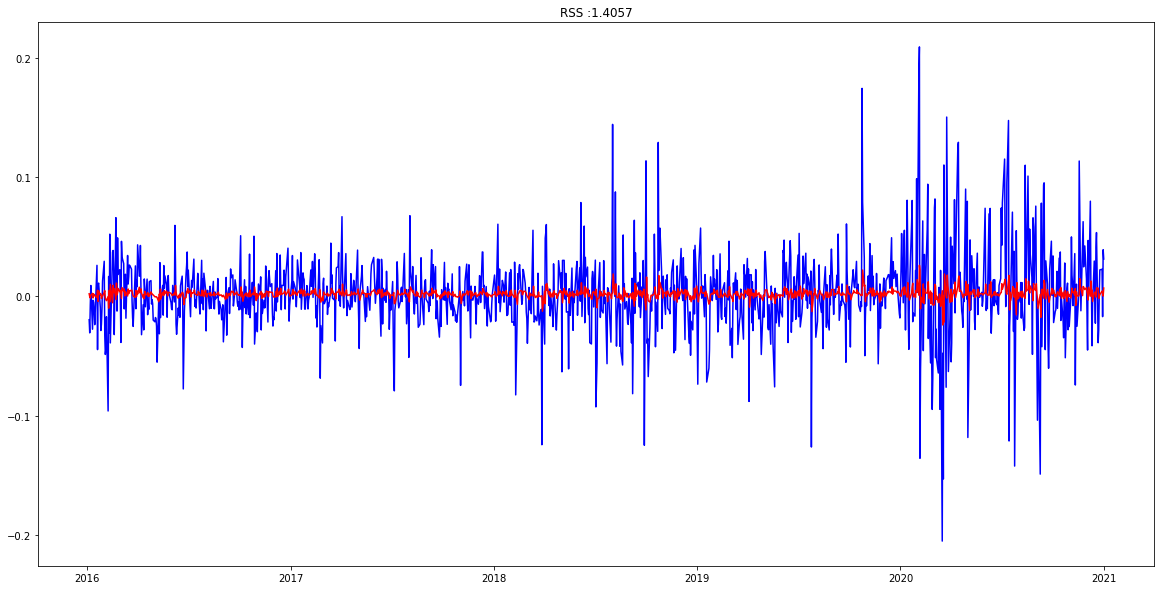

In [ ]:

model = ARIMA(tsla_train_log,  order = (2,1,2))
results_AR = model.fit(disp=-1)
plt.figure(figsize=[20,10])
plt.plot(tsla_train_log_diff, color = 'blue')
plt.plot(results_AR.fittedvalues, color='red')
plt.title( 'RSS :%.4f'%sum((results_AR.fittedvalues-tsla_train_log_diff)**2))

In [ ]:
pred_arima = pd.Series(results_AR.fittedvalues, copy=True)
#robie cumsum
pred_arima_cs = pred_arima.cumsum()

In [ ]:
pred_arima_log = pd.Series(tsla_train_log[0], index = tsla_train_log.index)
pred_arima_log = pred_arima_log.add(pred_arima_cs, fill_value = 0)

In [ ]:
pred_arima_log = np.exp(pred_arima_log)

In [ ]:
pred_arima_log.head()

Date
2016-01-04    46.276001
2016-01-05    46.377008
2016-01-06    46.363935
2016-01-07    46.301507
2016-01-08    46.345877
dtype: float64

In [ ]:
tsla_train.head()

Date
2016-01-04    46.276001
2016-01-05    45.377998
2016-01-06    44.009998
2016-01-07    43.688000
2016-01-08    44.088001
Name: High, dtype: float64

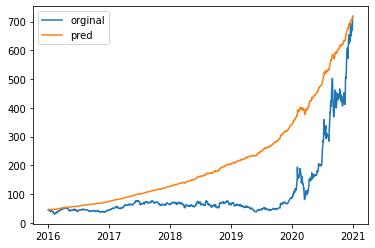

In [ ]:
#pred = np.exp(pred_arima_log)
plt.plot(tsla_train, label = 'orginal')
plt.plot(pred_arima_log, label = 'pred')
plt.legend(loc='best')

In [ ]:
tsla = pd.concat([tsla_train,tsla_test])

In [ ]:
fc, se, conf = results_AR.forecast(289 , alpha = 0.05)

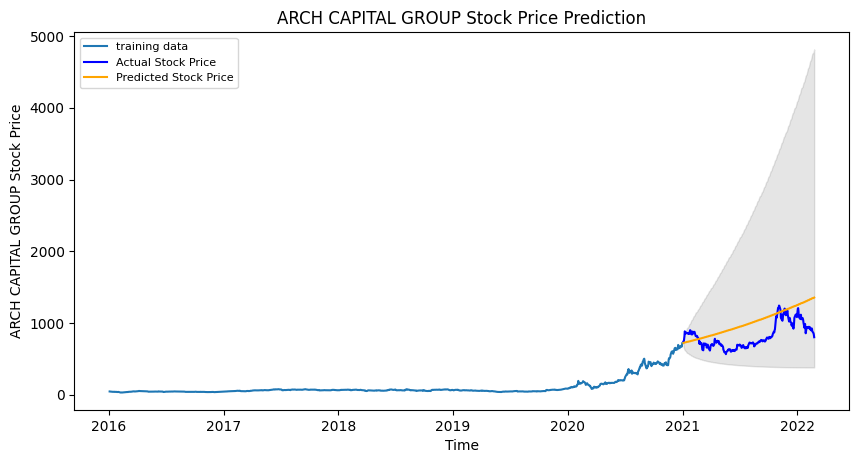

In [ ]:
fc_series = pd.Series(np.exp(fc), index=tsla_test.index)
lower_series = pd.Series(np.exp(conf[:, 0]), index=tsla_test.index)
upper_series = pd.Series(np.exp(conf[:, 1]), index=tsla_test.index)
# Plot
plt.figure(figsize=(10,5), dpi=100)
plt.plot(tsla_train, label='training data')
plt.plot(tsla_test, color = 'blue', label='Actual Stock Price')
plt.plot(fc_series, color = 'orange',label='Predicted Stock Price')
plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=0.1)
plt.title('ARCH CAPITAL GROUP Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('ARCH CAPITAL GROUP Stock Price')
plt.legend(loc='upper left', fontsize=8)
plt.show()

In [ ]:
# report performance
mse = mean_squared_error(tsla_test, np.exp(fc))
print('MSE: '+str(mse))
mae = mean_absolute_error(tsla_test, np.exp(fc))
print('MAE: '+str(mae))
rmse = math.sqrt(mean_squared_error(tsla_test, np.exp(fc)))
print('RMSE: '+str(rmse))
mape = np.mean(np.abs(np.exp(fc) - tsla_test)/np.abs(tsla_test))
print('MAPE: '+str(mape))

MSE: 57180.875127447325
MAE: 211.19674372374686
RMSE: 239.12522896475673
MAPE: 0.27696816296317295


In [ ]:
#LSTM

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout, GRU, Bidirectional
from keras import optimizers#SGD
import math
from sklearn.metrics import mean_squared_error

In [ ]:
tsla_train

Date
2016-01-04     46.276001
2016-01-05     45.377998
2016-01-06     44.009998
2016-01-07     43.688000
2016-01-08     44.088001
                 ...    
2020-12-24    666.090027
2020-12-28    681.400024
2020-12-29    669.900024
2020-12-30    696.599976
2020-12-31    718.719971
Name: High, Length: 1259, dtype: float64

In [88]:
sc = MinMaxScaler(feature_range=(0,1))
sc_fit = sc.fit(np.array(tsla_train).reshape(-1, 1))
training_set_scaled = sc_fit.transform(np.array(tsla_train).reshape(-1, 1))

In [89]:
X_train = []
y_train = []
for i in range(24,1259):
    X_train.append(training_set_scaled[i-24:i,0])
    y_train.append(training_set_scaled[i,0])
X_train, y_train = np.array(X_train), np.array(y_train)

In [ ]:
X_train = np.reshape(X_train, (X_train.shape[0],X_train.shape[1],1))

In [ ]:
# Tworze sieć LSTM
regressor = Sequential()
regressor.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1],1)))
regressor.add(Dropout(0.2))
regressor.add(LSTM(units=50, return_sequences=True))
regressor.add(Dropout(0.2))
regressor.add(LSTM(units=50, return_sequences=True))
regressor.add(Dropout(0.2))
regressor.add(LSTM(units=50))
regressor.add(Dropout(0.2))
regressor.add(Dense(units=1))

#kompilacja przed modelowaniem
regressor.compile(optimizer='Adam',loss='mean_squared_error')
#fitowanie modelu
regressor.fit(X_train,y_train,epochs=50,batch_size=32)

Epoch 1/50
39/39 [==============================] - 9s 47ms/step - loss: 0.0099
Epoch 2/50
39/39 [==============================] - 2s 47ms/step - loss: 0.0020
Epoch 3/50
39/39 [==============================] - 2s 48ms/step - loss: 0.0024
Epoch 4/50
39/39 [==============================] - 2s 46ms/step - loss: 0.0016
Epoch 5/50
39/39 [==============================] - 2s 46ms/step - loss: 0.0016
Epoch 6/50
39/39 [==============================] - 2s 47ms/step - loss: 0.0016
Epoch 7/50
39/39 [==============================] - 2s 48ms/step - loss: 0.0014
Epoch 8/50
39/39 [==============================] - 2s 48ms/step - loss: 0.0017
Epoch 9/50
39/39 [==============================] - 2s 46ms/step - loss: 0.0014
Epoch 10/50
39/39 [==============================] - 2s 46ms/step - loss: 0.0018
Epoch 11/50
39/39 [==============================] - 2s 46ms/step - loss: 0.0013
Epoch 12/50
39/39 [==============================] - 2s 46ms/step - loss: 0.0014
Epoch 13/50
39/39 [==================

In [94]:
dataset_total = pd.concat((tsla_train, tsla_test),axis=0)
dataset_total = sc_fit.transform(np.array(dataset_total).reshape(-1, 1))
inputs = dataset_total[len(dataset_total)-len(tsla_test) - 24:]#.values
inputs = inputs.reshape(-1,1)
#inputs  = sc.transform(inputs)

In [95]:
len(inputs)

313

In [110]:
len(tsla_test)

289

In [97]:
X_test = []
for i in range(24,313):
    X_test.append(inputs[i-24:i,0])

In [98]:
X_test = np.array(X_test)

In [104]:
X_test = np.reshape(X_test, (X_test.shape[0],24,1))
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc_fit.inverse_transform(predicted_stock_price)

In [106]:
pred_dta = []
for i in predicted_stock_price:
    pred_dta.append(i[0])

In [107]:
test = np.array(tsla_test).reshape(-1,1)

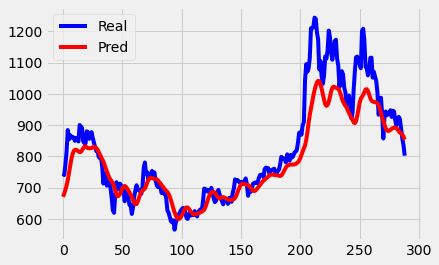

In [108]:
#wykres predicted vs real
plt.plot(test, color = 'blue',  label='Real')
plt.plot(predicted_stock_price, color = 'red',  label='Pred')
plt.legend()

In [109]:
# report performance
mse_lstm = mean_squared_error(test, predicted_stock_price)
print('MSE: '+str(mse_lstm))
mae_lstm = mean_absolute_error(test, predicted_stock_price)
print('MAE: '+str(mae_lstm))
rmse_lstm = math.sqrt(mean_squared_error(test, predicted_stock_price))
print('RMSE: '+str(rmse_lstm))
mape_lstm = np.mean(np.abs(predicted_stock_price - test)/np.abs(test))
print('MAPE: '+str(mape_lstm))

MSE: 5314.410308994121
MAE: 49.731629051551685
RMSE: 72.9000021193012
MAPE: 0.054562807460760816


In [65]:
#prophnet

In [66]:
!pip install prophet

     |████████████████████████████████| 65 kB 3.9 MB/s 
     |████████████████████████████████| 49 kB 5.8 MB/s 
     |████████████████████████████████| 43 kB 2.4 MB/s 
  Created wheel for prophet: filename=prophet-1.0.1-py3-none-any.whl size=6640177 sha256=dafc189697da2daf164ce183bb7bcdf1929031a9e36e5d35b60fa791b2720696
  Stored in directory: /root/.cache/pip/wheels/4e/a0/1a/02c9ec9e3e9de6bdbb3d769d11992a6926889d71567d6b9b67
Successfully built prophet
  Attempting uninstall: cmdstanpy
    Found existing installation: cmdstanpy 0.9.5
    Uninstalling cmdstanpy-0.9.5:
      Successfully uninstalled cmdstanpy-0.9.5
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
fbprophet 0.7.1 requires cmdstanpy==0.9.5, but you have cmdstanpy 0.9.68 which is incompatible.


In [68]:
import prophet
from matplotlib import pyplot as plt

<function matplotlib.pyplot.show>

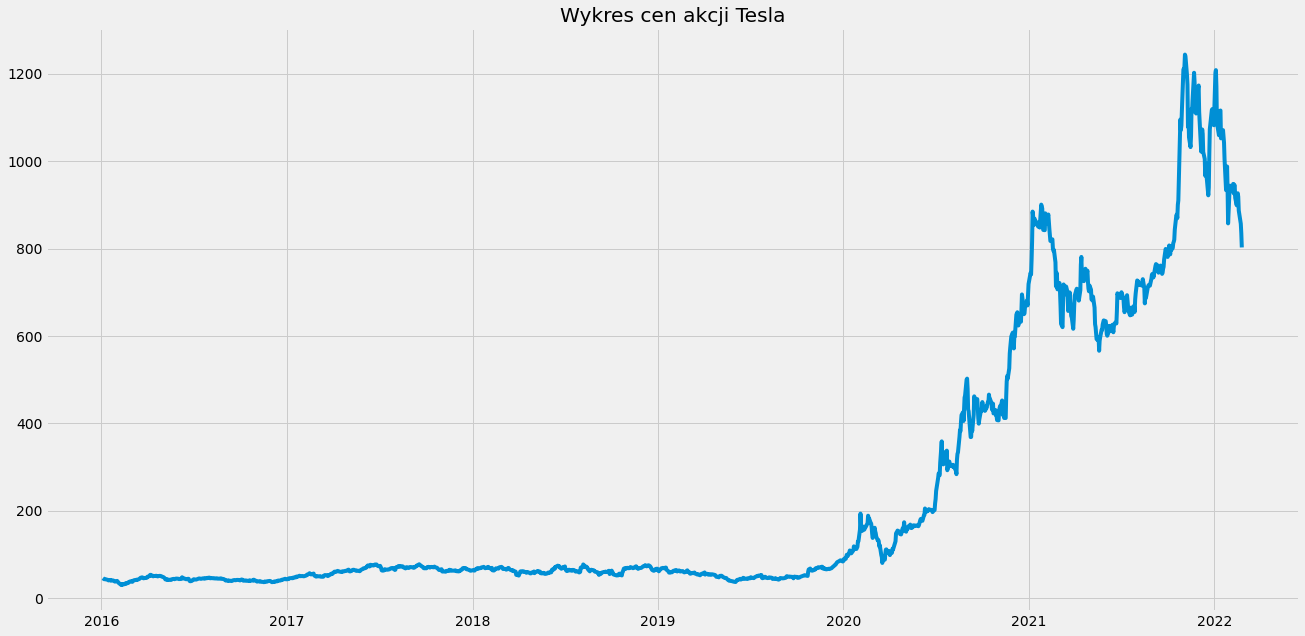

In [69]:

plt.figure(figsize=[20,10])
plt.plot(tsla_df_hi)
plt.title('Wykres cen akcji Tesla')
plt.show

In [70]:
model = prophet.Prophet()

In [71]:
prop_tsla_tr = pd.DataFrame(tsla_train).reset_index()

In [72]:
prop_tsla_tr.columns = ["ds","y"]

In [73]:
prop_tsla_tr["ds"] = pd.to_datetime(prop_tsla_tr["ds"])

In [74]:
prop_tsla_tr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   ds      1259 non-null   datetime64[ns]
 1   y       1259 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 19.8 KB


In [75]:
model.fit(prop_tsla_tr)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [76]:
prop_tsla_test = pd.DataFrame(tsla_test).reset_index()
prop_tsla_test.columns = ["ds","y"]
future = prop_tsla_test[['ds']]

In [77]:
forecast = model.predict(future)

In [78]:
#y z daszkiem to prognozowane a dwa kolejne to przedział ufności
print(forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].head())

          ds        yhat  yhat_lower  yhat_upper
0 2021-01-04  590.605705  559.821948  619.699111
1 2021-01-05  590.748127  560.375263  621.793924
2 2021-01-06  590.746434  559.458633  622.014077
3 2021-01-07  591.356216  561.284166  621.779719
4 2021-01-08  590.824725  563.992308  622.401791


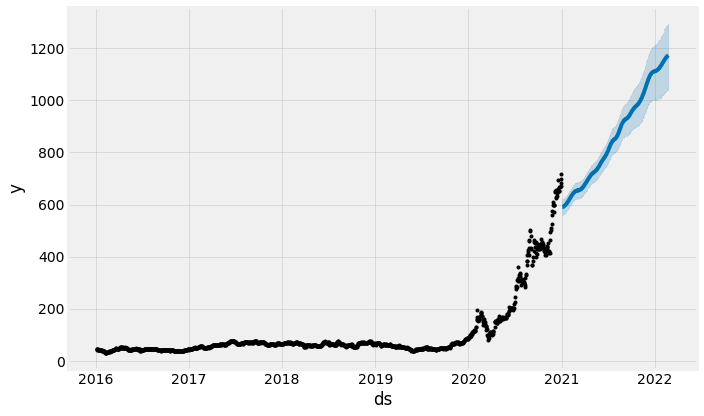

In [81]:
model.plot(forecast)
plt.show()

In [82]:
forecast = forecast.set_index('ds')

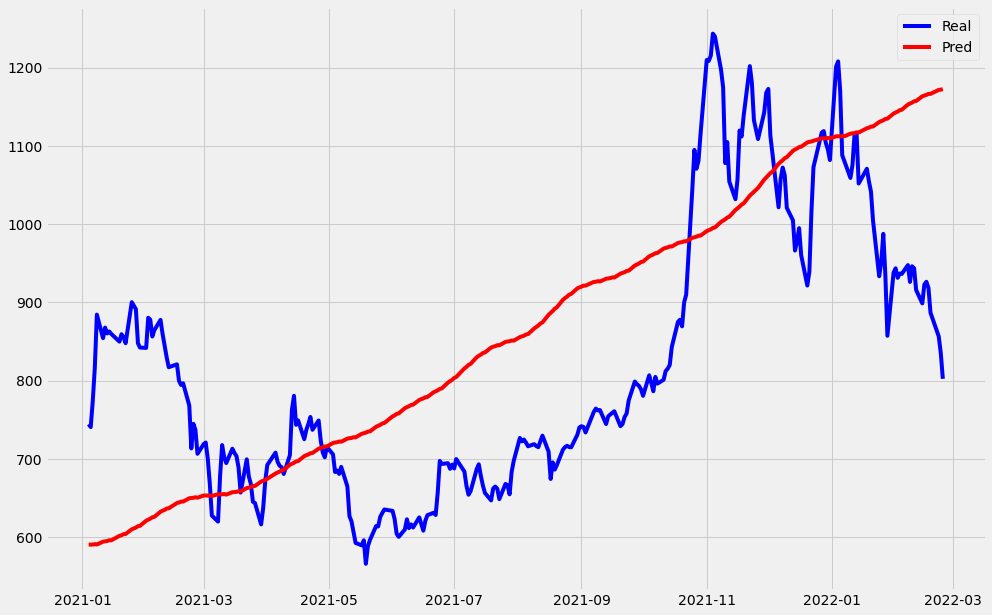

In [84]:
# real vs pred 
plt.figure(figsize=[15,10])
plt.plot(tsla_test, color = 'blue', label = 'Real')
plt.plot(forecast['yhat'], color='red', label = 'Pred')
plt.legend()
plt.show()

In [85]:
mse_lstm = mean_squared_error(tsla_test, forecast['yhat'])
print('MSE: '+str(mse_lstm))
mae_lstm = mean_absolute_error(tsla_test, forecast['yhat'])
print('MAE: '+str(mae_lstm))
rmse_lstm = math.sqrt(mean_squared_error(tsla_test, forecast['yhat']))
print('RMSE: '+str(rmse_lstm))
mape_lstm = np.mean(np.abs(forecast['yhat'] - tsla_test)/np.abs(tsla_test))
print('MAPE: '+str(mape_lstm))

MSE: 23581.657293401666
MAE: 132.57076122817432
RMSE: 153.56320292765994
MAPE: 0.16727188464222117
